In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic Analysis

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [6]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.director.fillna("Unknown Director",inplace=True)
df.cast.fillna("Unknown Cast", inplace=True)
df.country.fillna("Unknown Country", inplace = True)

In [9]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [10]:
df.dropna(subset=["date_added", "rating", "duration"], inplace = True)

In [11]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- As the country count is 700+ it may consist of multiple country for one show

In [13]:
df["country"] = df["country"].str.split(", ")
s1 = df.shape
df = df.explode("country")
print(s1,"after exploding--->",df.shape)

(8790, 12) after exploding---> (10828, 12)


In [14]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

- Spliting with respect to type

In [15]:
df_mov = df[df["type"]=="Movie"]
df_tv = df[df["type"]=="TV Show"]

In [16]:
mov_wise = df_mov[df_mov.country != "Unknown Country"].groupby("country")["title"].nunique().reset_index()
mov_wise_top10 = mov_wise.sort_values(by="title",ascending=False).head(10)
mov_wise_top10

,country,title
114,United States,2748
43,India,962
112,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


In [17]:
tv_wise = df_tv[df_tv["country"] !="Unknown Country"].groupby("country")["title"].nunique().reset_index()
tv_wise_top10 = tv_wise.sort_values(by="title",ascending=False).head(10)
tv_wise_top10

,country,title
63,United States,932
62,United Kingdom,271
30,Japan,197
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,64
53,Spain,61


## EDA

- Movie Vs TV shows

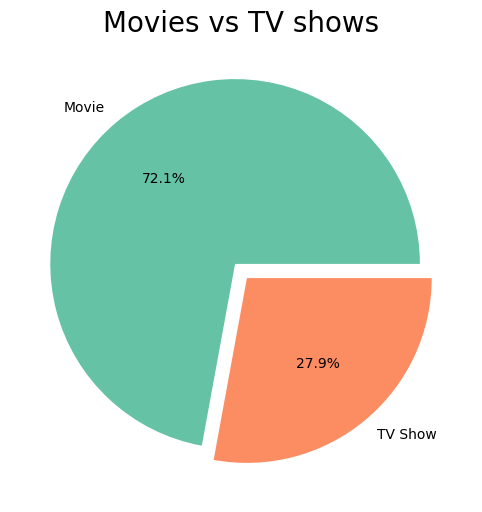

In [18]:
plt.figure(figsize=(10,6))
plt.pie(df.type.value_counts(),explode=(0.05,0.05),labels = df.type.value_counts().index,autopct="%1.1f%%",colors=sns.color_palette("Set2"))
plt.title("Movies vs TV shows",fontsize=20)
plt.show()

- ***Insight*** : Netflix has more than 72% are movies and around 28% TV shows 

/tmp/ipykernel_1721/2156891750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(mov_wise_top10,x="country",y="title",palette="Spectral")
/tmp/ipykernel_1721/2156891750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tv_wise_top10,x="country",y="title",palette="Spectral")


Text(0.5, 1.0, 'TV Shows')

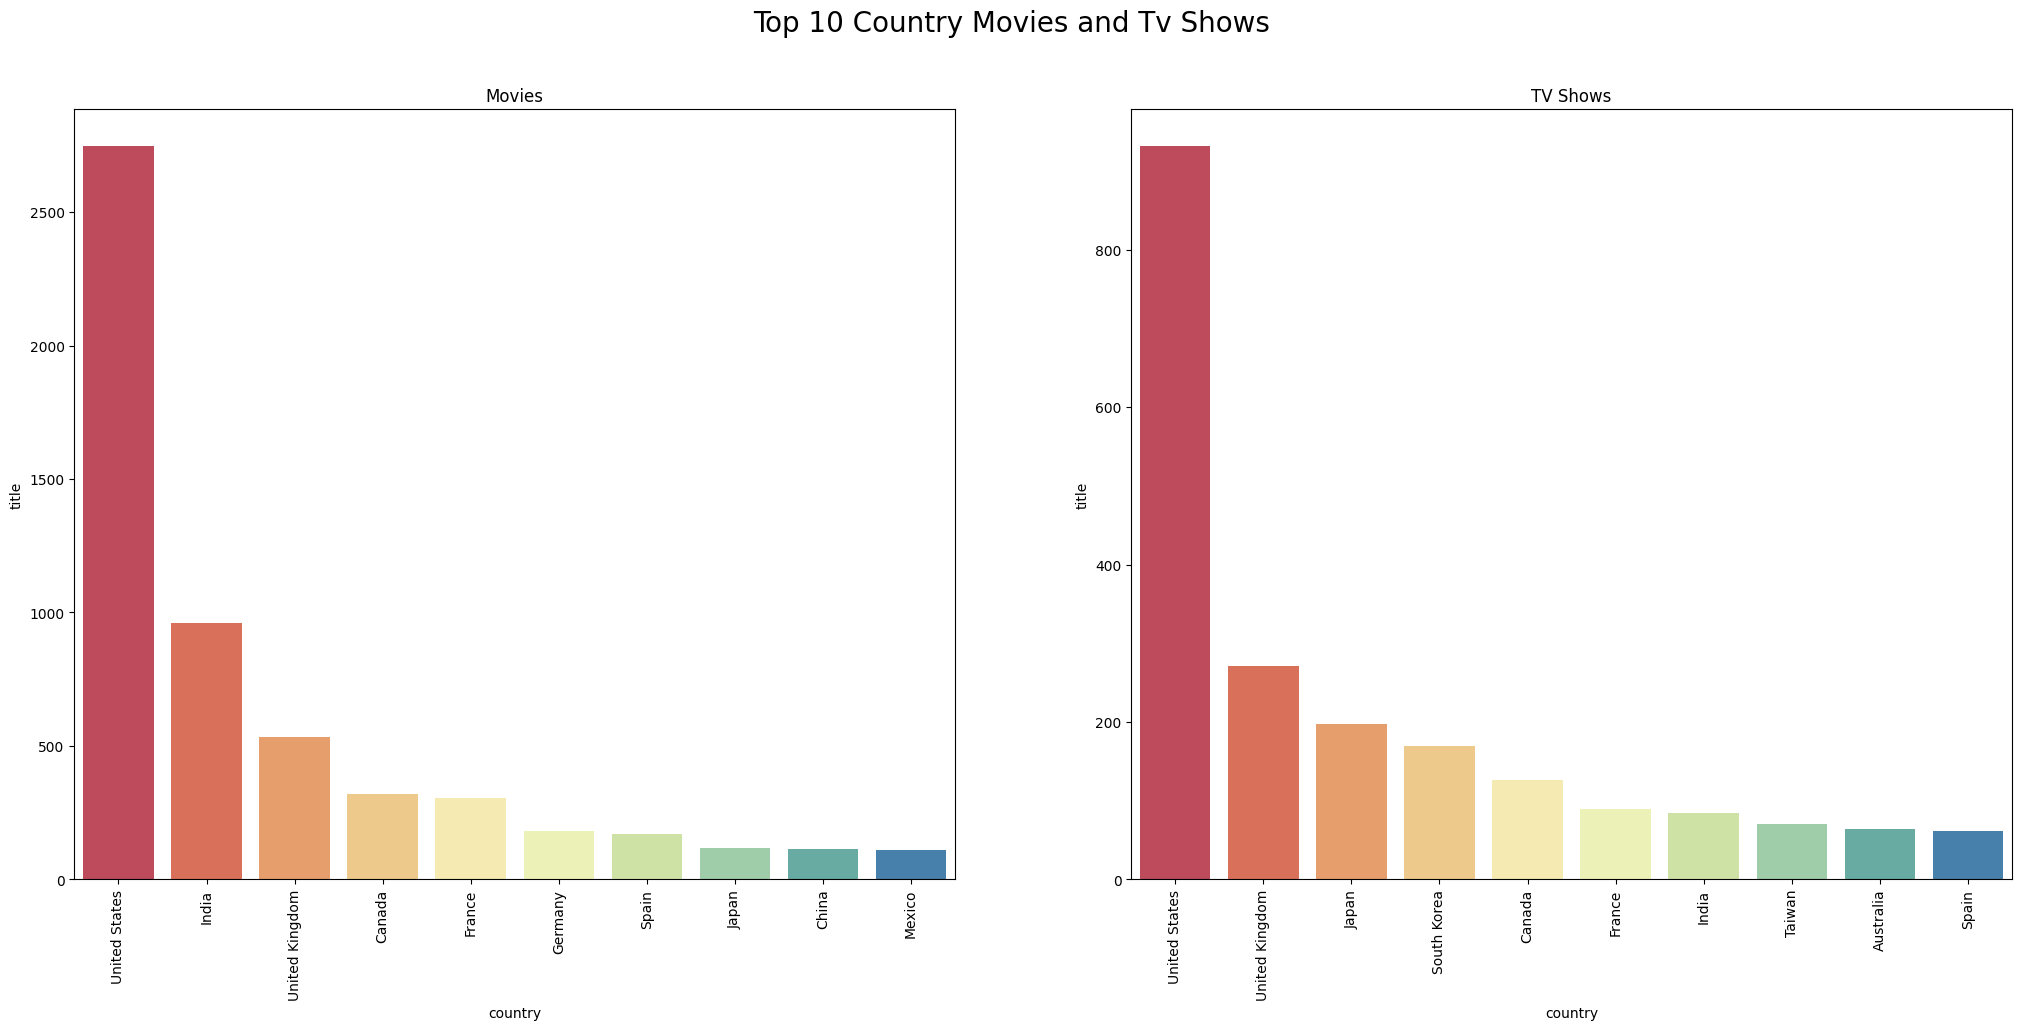

In [19]:
plt.figure(figsize=(25,10)).suptitle("Top 10 Country Movies and Tv Shows", fontsize=20)

plt.subplot(1,2,1)
sns.barplot(mov_wise_top10,x="country",y="title",palette="Spectral")
plt.xticks(rotation=90)
plt.title("Movies")

plt.subplot(1,2,2)
sns.barplot(tv_wise_top10,x="country",y="title",palette="Spectral")
plt.xticks(rotation=90)
plt.title("TV Shows")


- ***Insight***: Top 3 Countries released the content are US ,India, UK.

Text(0.5, 1.0, 'Distribution Of rating')

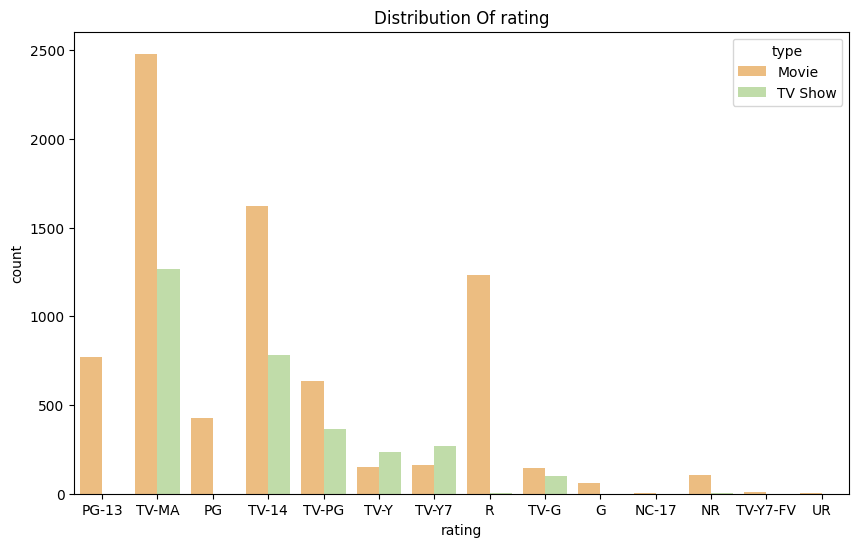

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="rating",hue="type",palette="Spectral")
plt.title("Distribution Of rating")

In [21]:
rating_age_groups = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_group'] = df['rating'].replace(rating_age_groups)

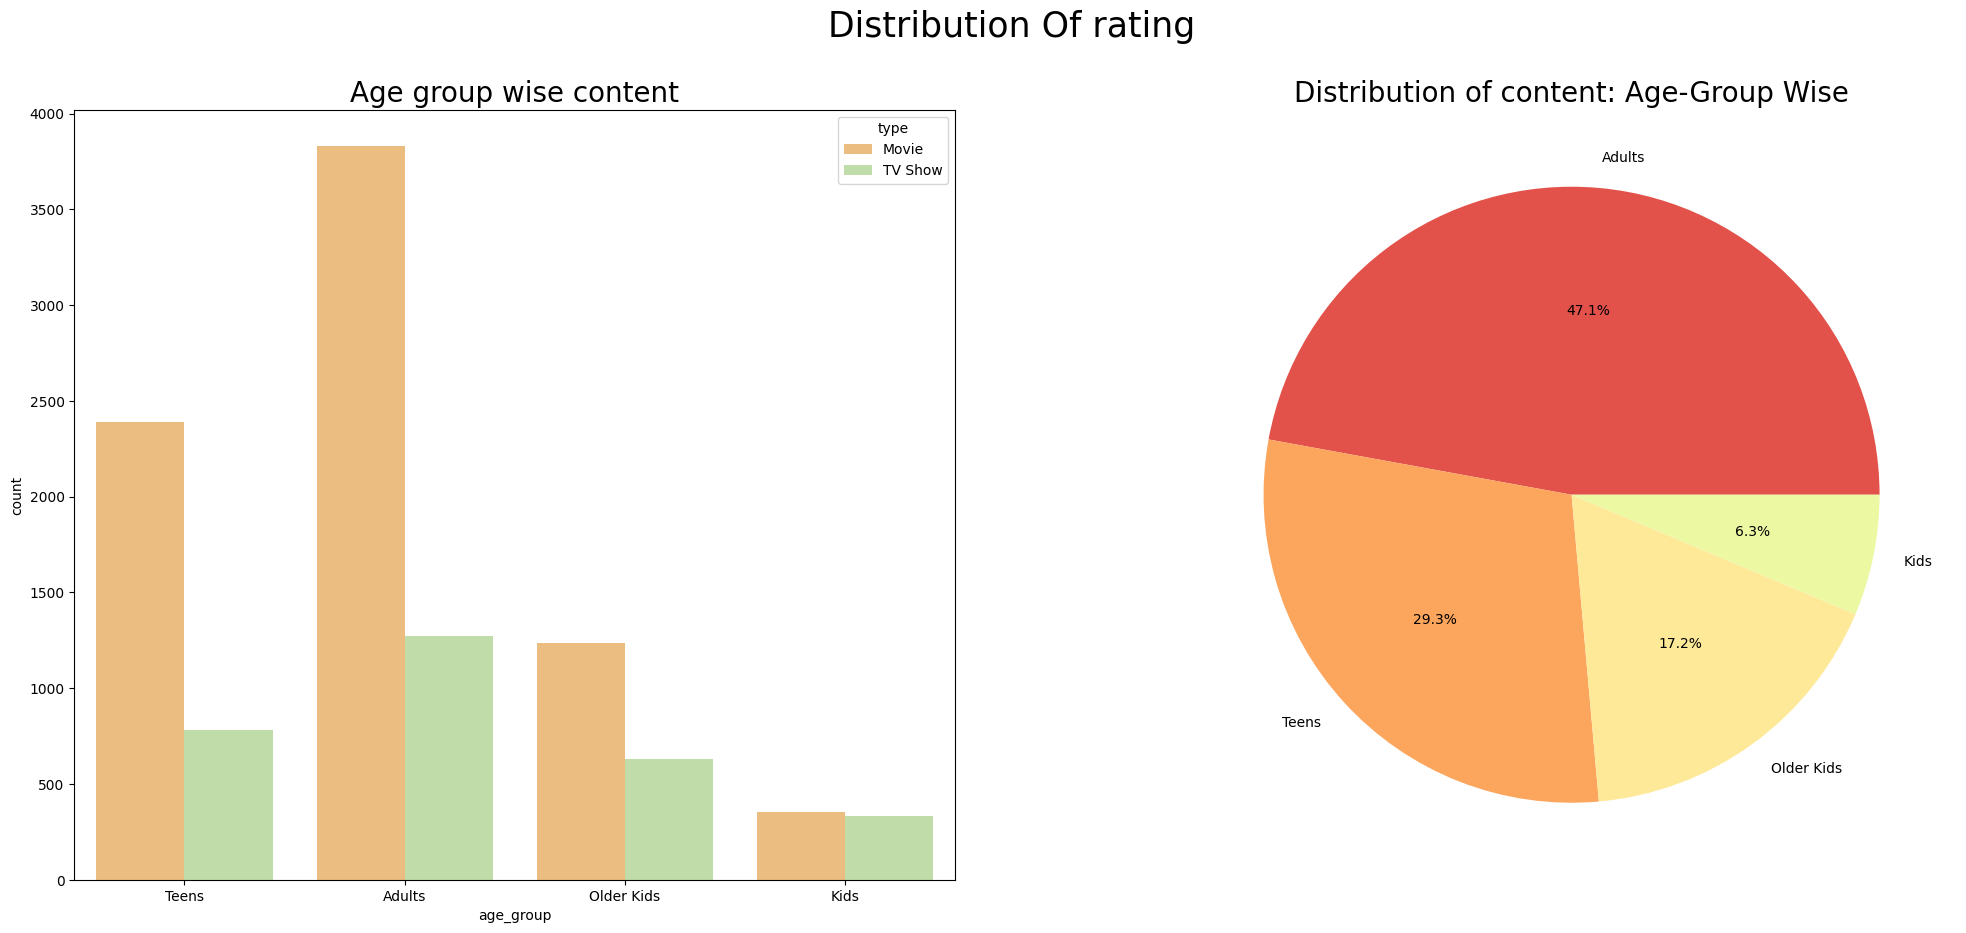

In [22]:
plt.figure(figsize=(25,10)).suptitle("Distribution Of rating",fontsize=25)

plt.subplot(1,2,1)
sns.countplot(data=df,x="age_group",hue="type",palette="Spectral")
plt.title("Age group wise content",fontsize=20)

plt.subplot(1,2,2)
plt.pie(x=df["age_group"].value_counts(),autopct='%1.1f%%',labels=df["age_group"].value_counts().index,colors=sns.color_palette("Spectral"))
plt.title('Distribution of content: Age-Group Wise', fontsize=20)

plt.show()

- ***Insight***: Distribution of content in age_group shows that the Adults and Teens are biggest audience to the Netflix

In [23]:
df_temp = df.copy()
df_temp['month_added']=df_temp['date_added'].str.split().apply(lambda x:x[0])

In [24]:
df_temp.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September


In [25]:
month_wise_tv = df_temp[df_temp["type"]=="TV Show"].groupby("month_added")["title"].nunique().sort_values(ascending=False).reset_index()
month_wise_tv.head()

,month_added,title
0,December,265
1,July,262
2,September,251
3,August,236
4,June,236


In [26]:
month_wise_mov = df_temp[df_temp["type"]=="Movie"].groupby("month_added")["title"].nunique().sort_values(ascending=False).reset_index()
month_wise_mov.head()

,month_added,title
0,July,565
1,April,549
2,December,547
3,January,545
4,October,545


/tmp/ipykernel_1721/2481463526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_wise_mov, x="month_added",y="title",palette="Spectral")


Text(0.5, 1.0, 'Movies')

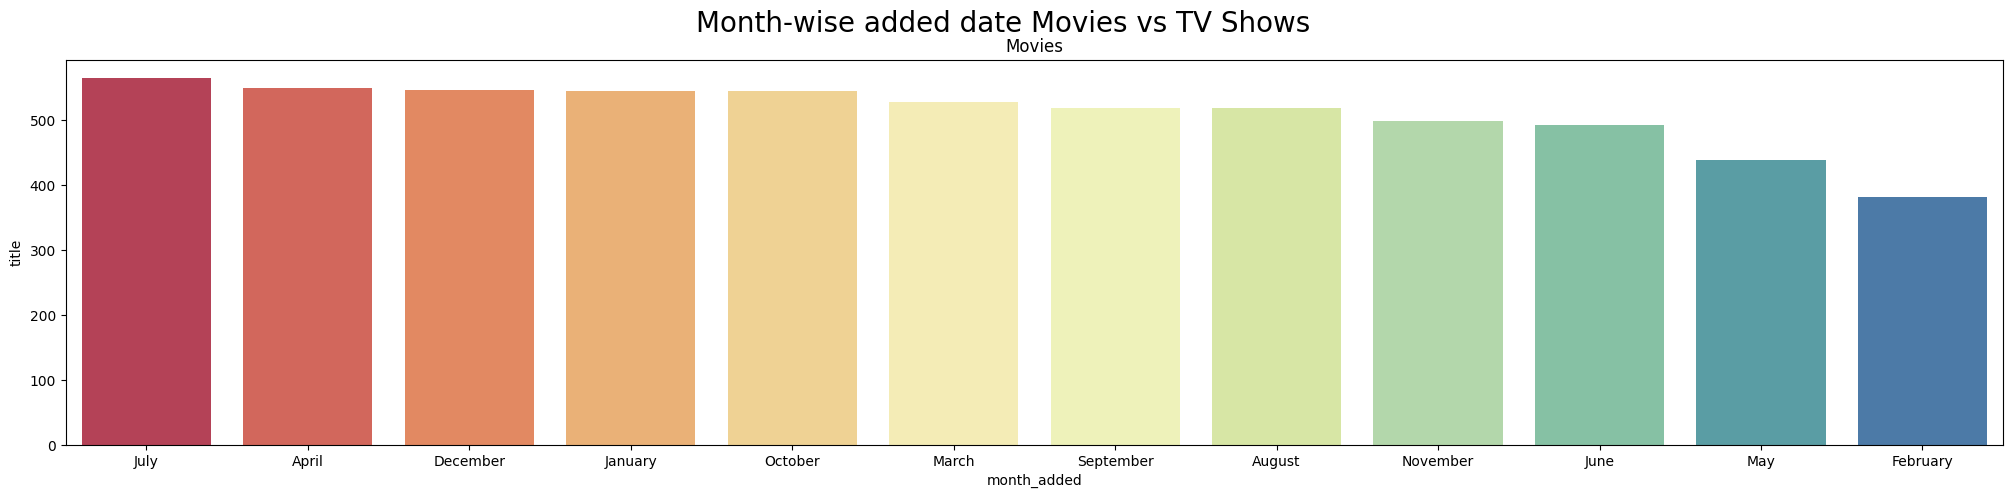

In [27]:
plt.figure(figsize=(25,5)).suptitle("Month-wise added date Movies vs TV Shows",fontsize=20)

sns.barplot(data=month_wise_mov, x="month_added",y="title",palette="Spectral")
plt.title("Movies")



/tmp/ipykernel_1721/2643160612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_wise_tv, x="month_added",y="title",palette=("Spectral"))


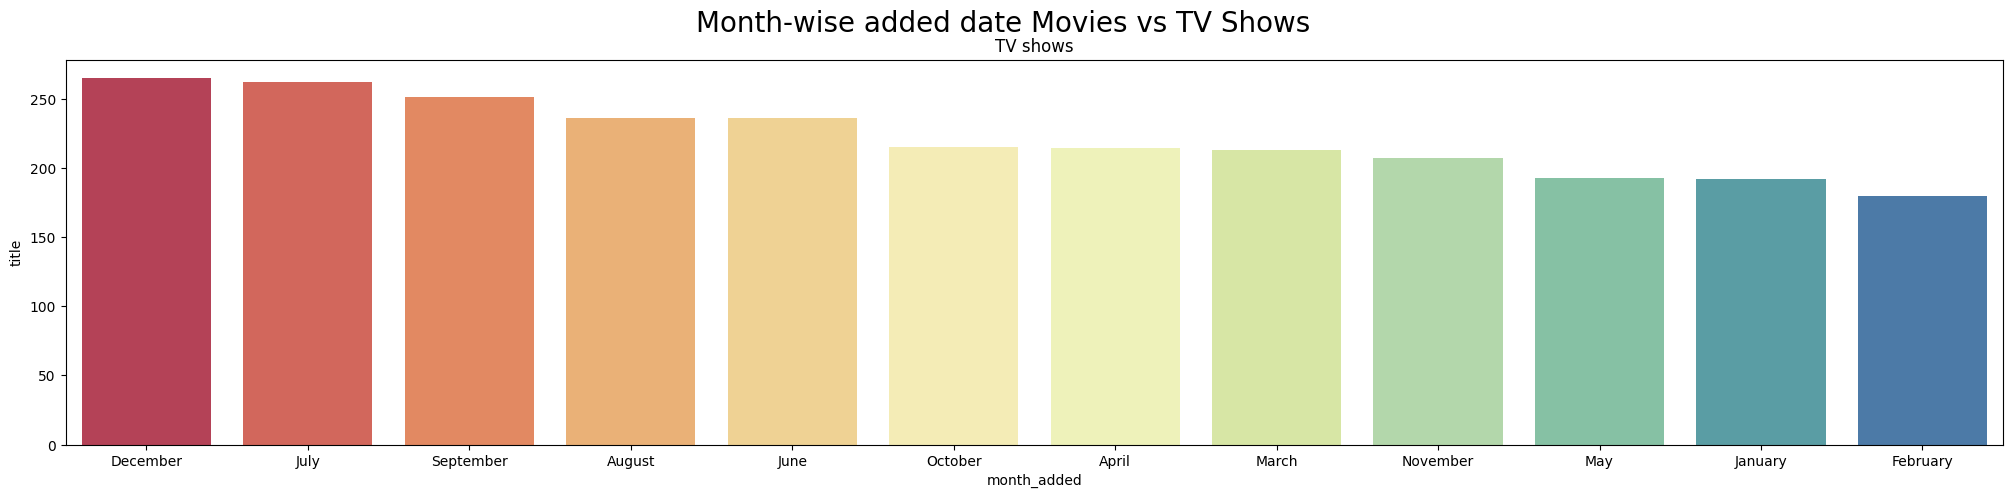

In [28]:
plt.figure(figsize=(25,5)).suptitle("Month-wise added date Movies vs TV Shows",fontsize=20)

sns.barplot(data=month_wise_tv, x="month_added",y="title",palette=("Spectral"))
plt.title("TV shows")

plt.show()

In [29]:
df.date_added = pd.to_datetime(df.date_added.str.strip())

In [30]:
df['week_added']=df.date_added.dt.isocalendar().week

In [31]:
week_wise_mov = df[df["type"]=="Movie"].groupby("week_added")["title"].nunique().reset_index().sort_values("title").head()
week_wise_tv = df[df["type"]=="TV Show"].groupby("week_added")["title"].nunique().reset_index().sort_values("title").head()

/tmp/ipykernel_1721/1128308629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=week_wise_mov, x="week_added", y="title",palette=("Spectral"))
/tmp/ipykernel_1721/1128308629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=week_wise_mov, x="week_added", y="title",palette=("Spectral"))


Text(0.5, 1.0, 'TV Shows')

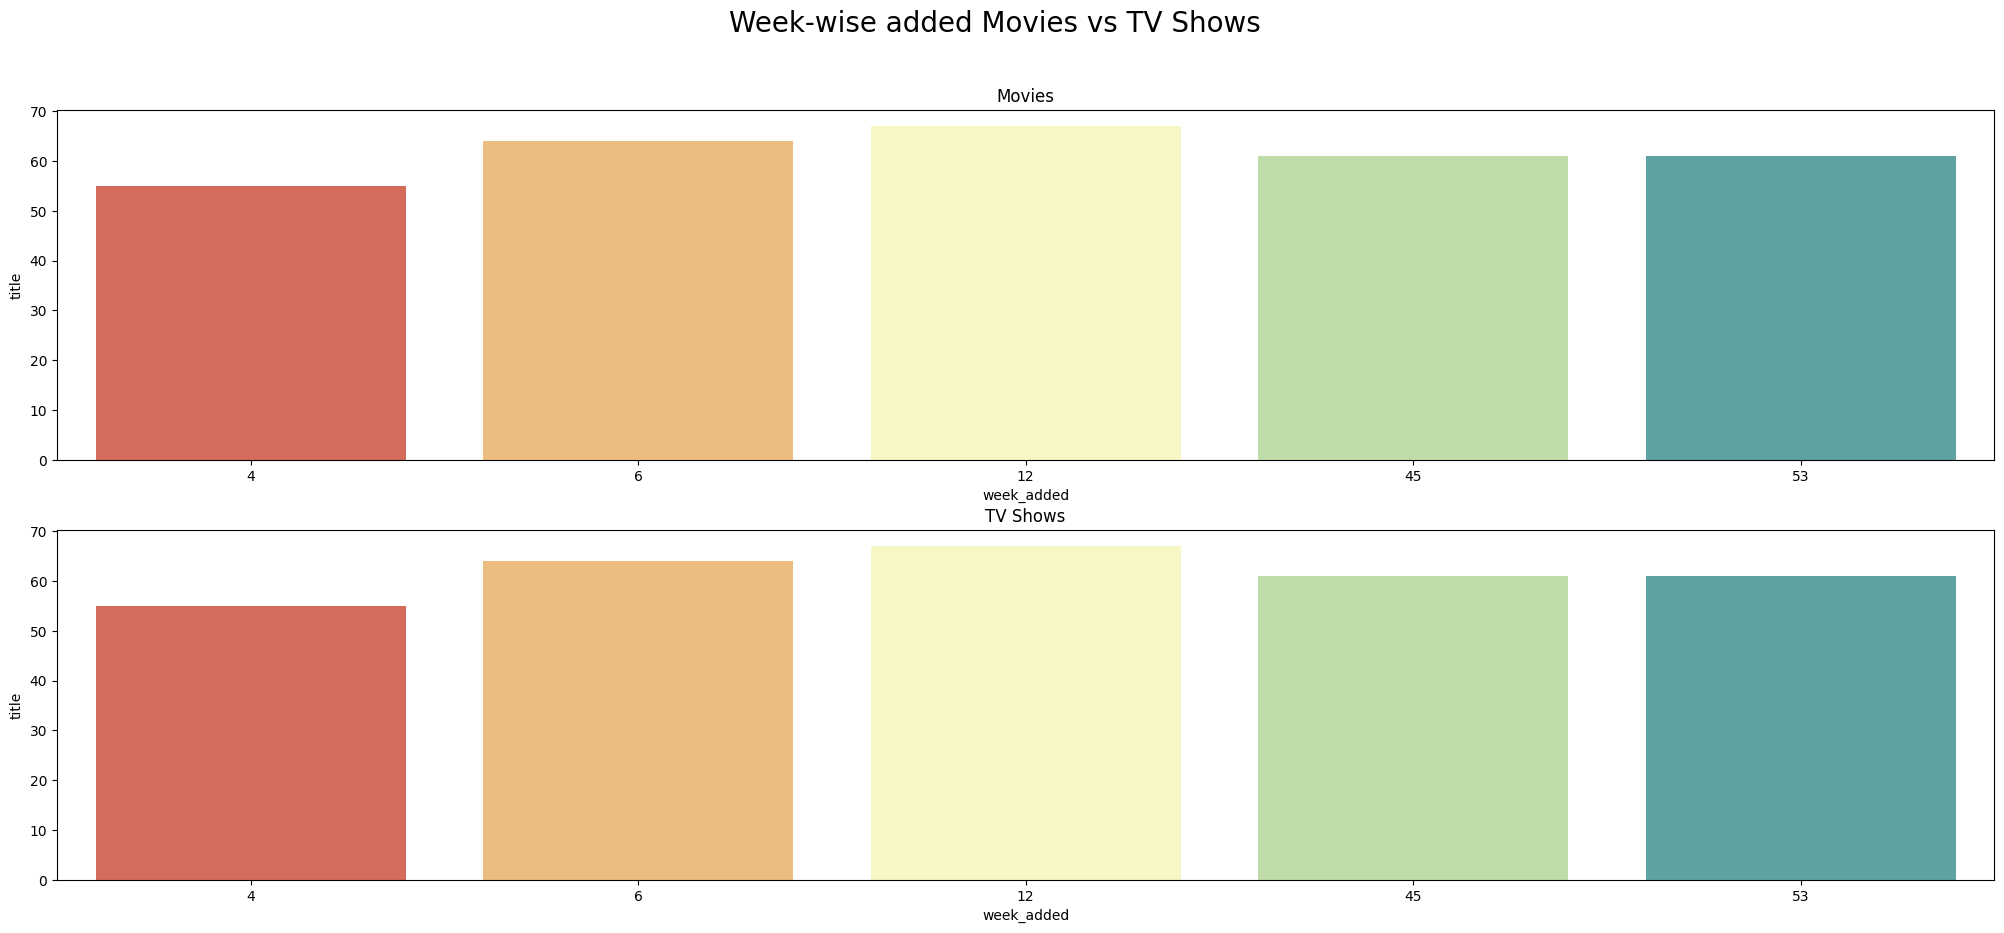

In [32]:
plt.figure(figsize=(25,10)).suptitle("Week-wise added Movies vs TV Shows",fontsize=20)
plt.subplot(2,1,1)
sns.barplot(data=week_wise_mov, x="week_added", y="title",palette=("Spectral"))
plt.title("Movies")

plt.subplot(2,1,2)
sns.barplot(data=week_wise_mov, x="week_added", y="title",palette=("Spectral"))
plt.title("TV Shows")

In [33]:
df_temp['listed_in'].count()

10828

In [34]:
df_temp = df.copy()
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,38
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,38
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,38


In [35]:
df_temp["listed_in"] = df_temp["listed_in"].str.split(", ")
df_temp = df_temp.explode("listed_in")

In [36]:
df_temp.shape

(23725, 14)

In [37]:
df_temp['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [38]:
listed_wise_mov=df_temp[df_temp.type=='Movie'].groupby('listed_in')['title'].nunique().reset_index()
listed_wise_mov_top10=listed_wise_mov.sort_values('title', ascending=False).head(10)
listed_wise_mov_top10

,listed_in,title
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


In [39]:
#top 10 genre (TV Show)
listed_wise_TV=df_temp[df_temp.type=='TV Show'].groupby('listed_in')['title'].nunique().reset_index()
listed_wise_TV_top10= listed_wise_TV.sort_values('title', ascending=False).head(10)
listed_wise_TV_top10

,listed_in,title
5,International TV Shows,1349
15,TV Dramas,762
14,TV Comedies,573
3,Crime TV Shows,469
6,Kids' TV,448
4,Docuseries,394
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,252
0,Anime Series,174


/tmp/ipykernel_1721/1984248639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=listed_wise_mov_top10, x='listed_in', y='title', palette=("Spectral"))
/tmp/ipykernel_1721/1984248639.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=listed_wise_TV_top10, x='listed_in', y='title', palette=("Spectral"))


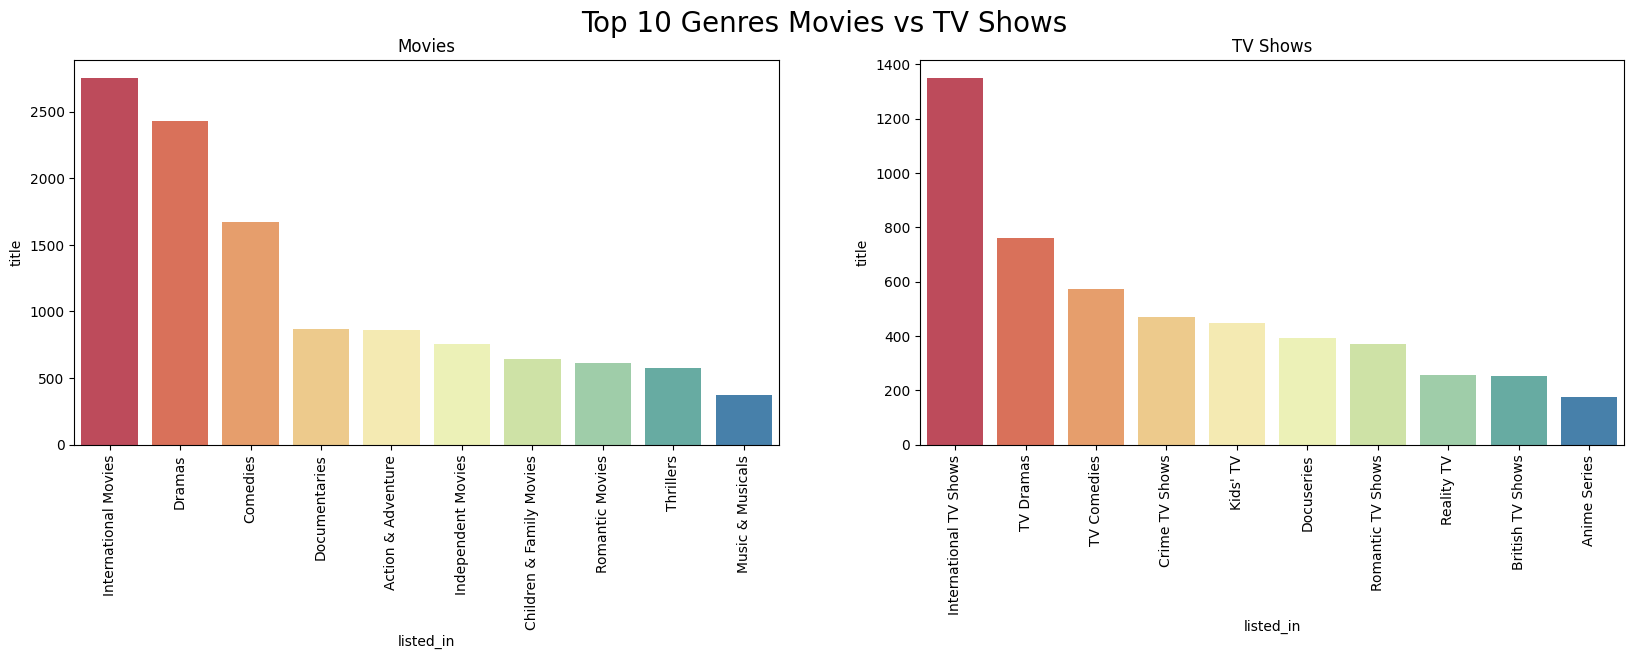

In [40]:
plt.figure(figsize=(20,5)).suptitle("Top 10 Genres Movies vs TV Shows",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=listed_wise_mov_top10, x='listed_in', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=listed_wise_TV_top10, x='listed_in', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("TV Shows")

plt.show()

- ***Insight***: International Movies and shows, Dramas, and Comedy performing best in both the types, however the documentaries in movies and crime in TV shows also working good.

In [41]:
df_cont = df_temp.copy()
df_temp.groupby(["age_group", "country"]).count()[["title","type"]].reset_index().sort_values(by="title",ascending=False).head()

,age_group,country,title,type
97,Adults,United States,3367,3367
300,Teens,United States,1739,1739
252,Teens,India,1594,1594
218,Older Kids,United States,1266,1266
95,Adults,United Kingdom,911,911


In [46]:
teen_df = df_cont[(df_cont["country"] != "Unknown Country") & (df_cont["age_group"] == "Teens")].groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()
teens_df_top10 = teen_df.head(10)

kids_df = df_cont[(df_cont["country"] != "Unknown Country") & (df_cont["age_group"] == "Kids")].groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()
kids_df_top10 = kids_df.head(10)

older_kids_df = df_cont[(df_cont["country"] != "Unknown Country") & (df_cont["age_group"] == "Older Kids")].groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()
older_kids_df_top10 = older_kids_df.head(10)

adults_df = df_cont[(df_cont["country"] != "Unknown Country") & (df_cont["age_group"] == "Adults")].groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()
adults_df_top10 = adults_df.head(10)

In [47]:
teens_df=df_temp.loc[df_temp['country']!='Unknown Country'].groupby(['age_group', 'country'])[['title','type']].nunique().reset_index()
teens_df[teens_df.age_group=='Teens'].sort_values('title', ascending=False).head(10)

,age_group,country,title,type
297,Teens,United States,928,2
249,Teens,India,583,2
296,Teens,United Kingdom,187,2
255,Teens,Japan,107,2
285,Teens,South Korea,87,2
241,Teens,France,83,2
231,Teens,Canada,81,2
239,Teens,Egypt,77,2
233,Teens,China,71,2
243,Teens,Germany,58,2


/tmp/ipykernel_1721/262460346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=teens_df_top10,x="country",y="title",palette=("Spectral"))
/tmp/ipykernel_1721/262460346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kids_df_top10,x="country",y="title",palette=("Spectral"))
/tmp/ipykernel_1721/262460346.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=older_kids_df_top10,x="country",y="title",palette=("Spectral"))
/tmp/ipykernel_1721/262460346.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is depre

[]

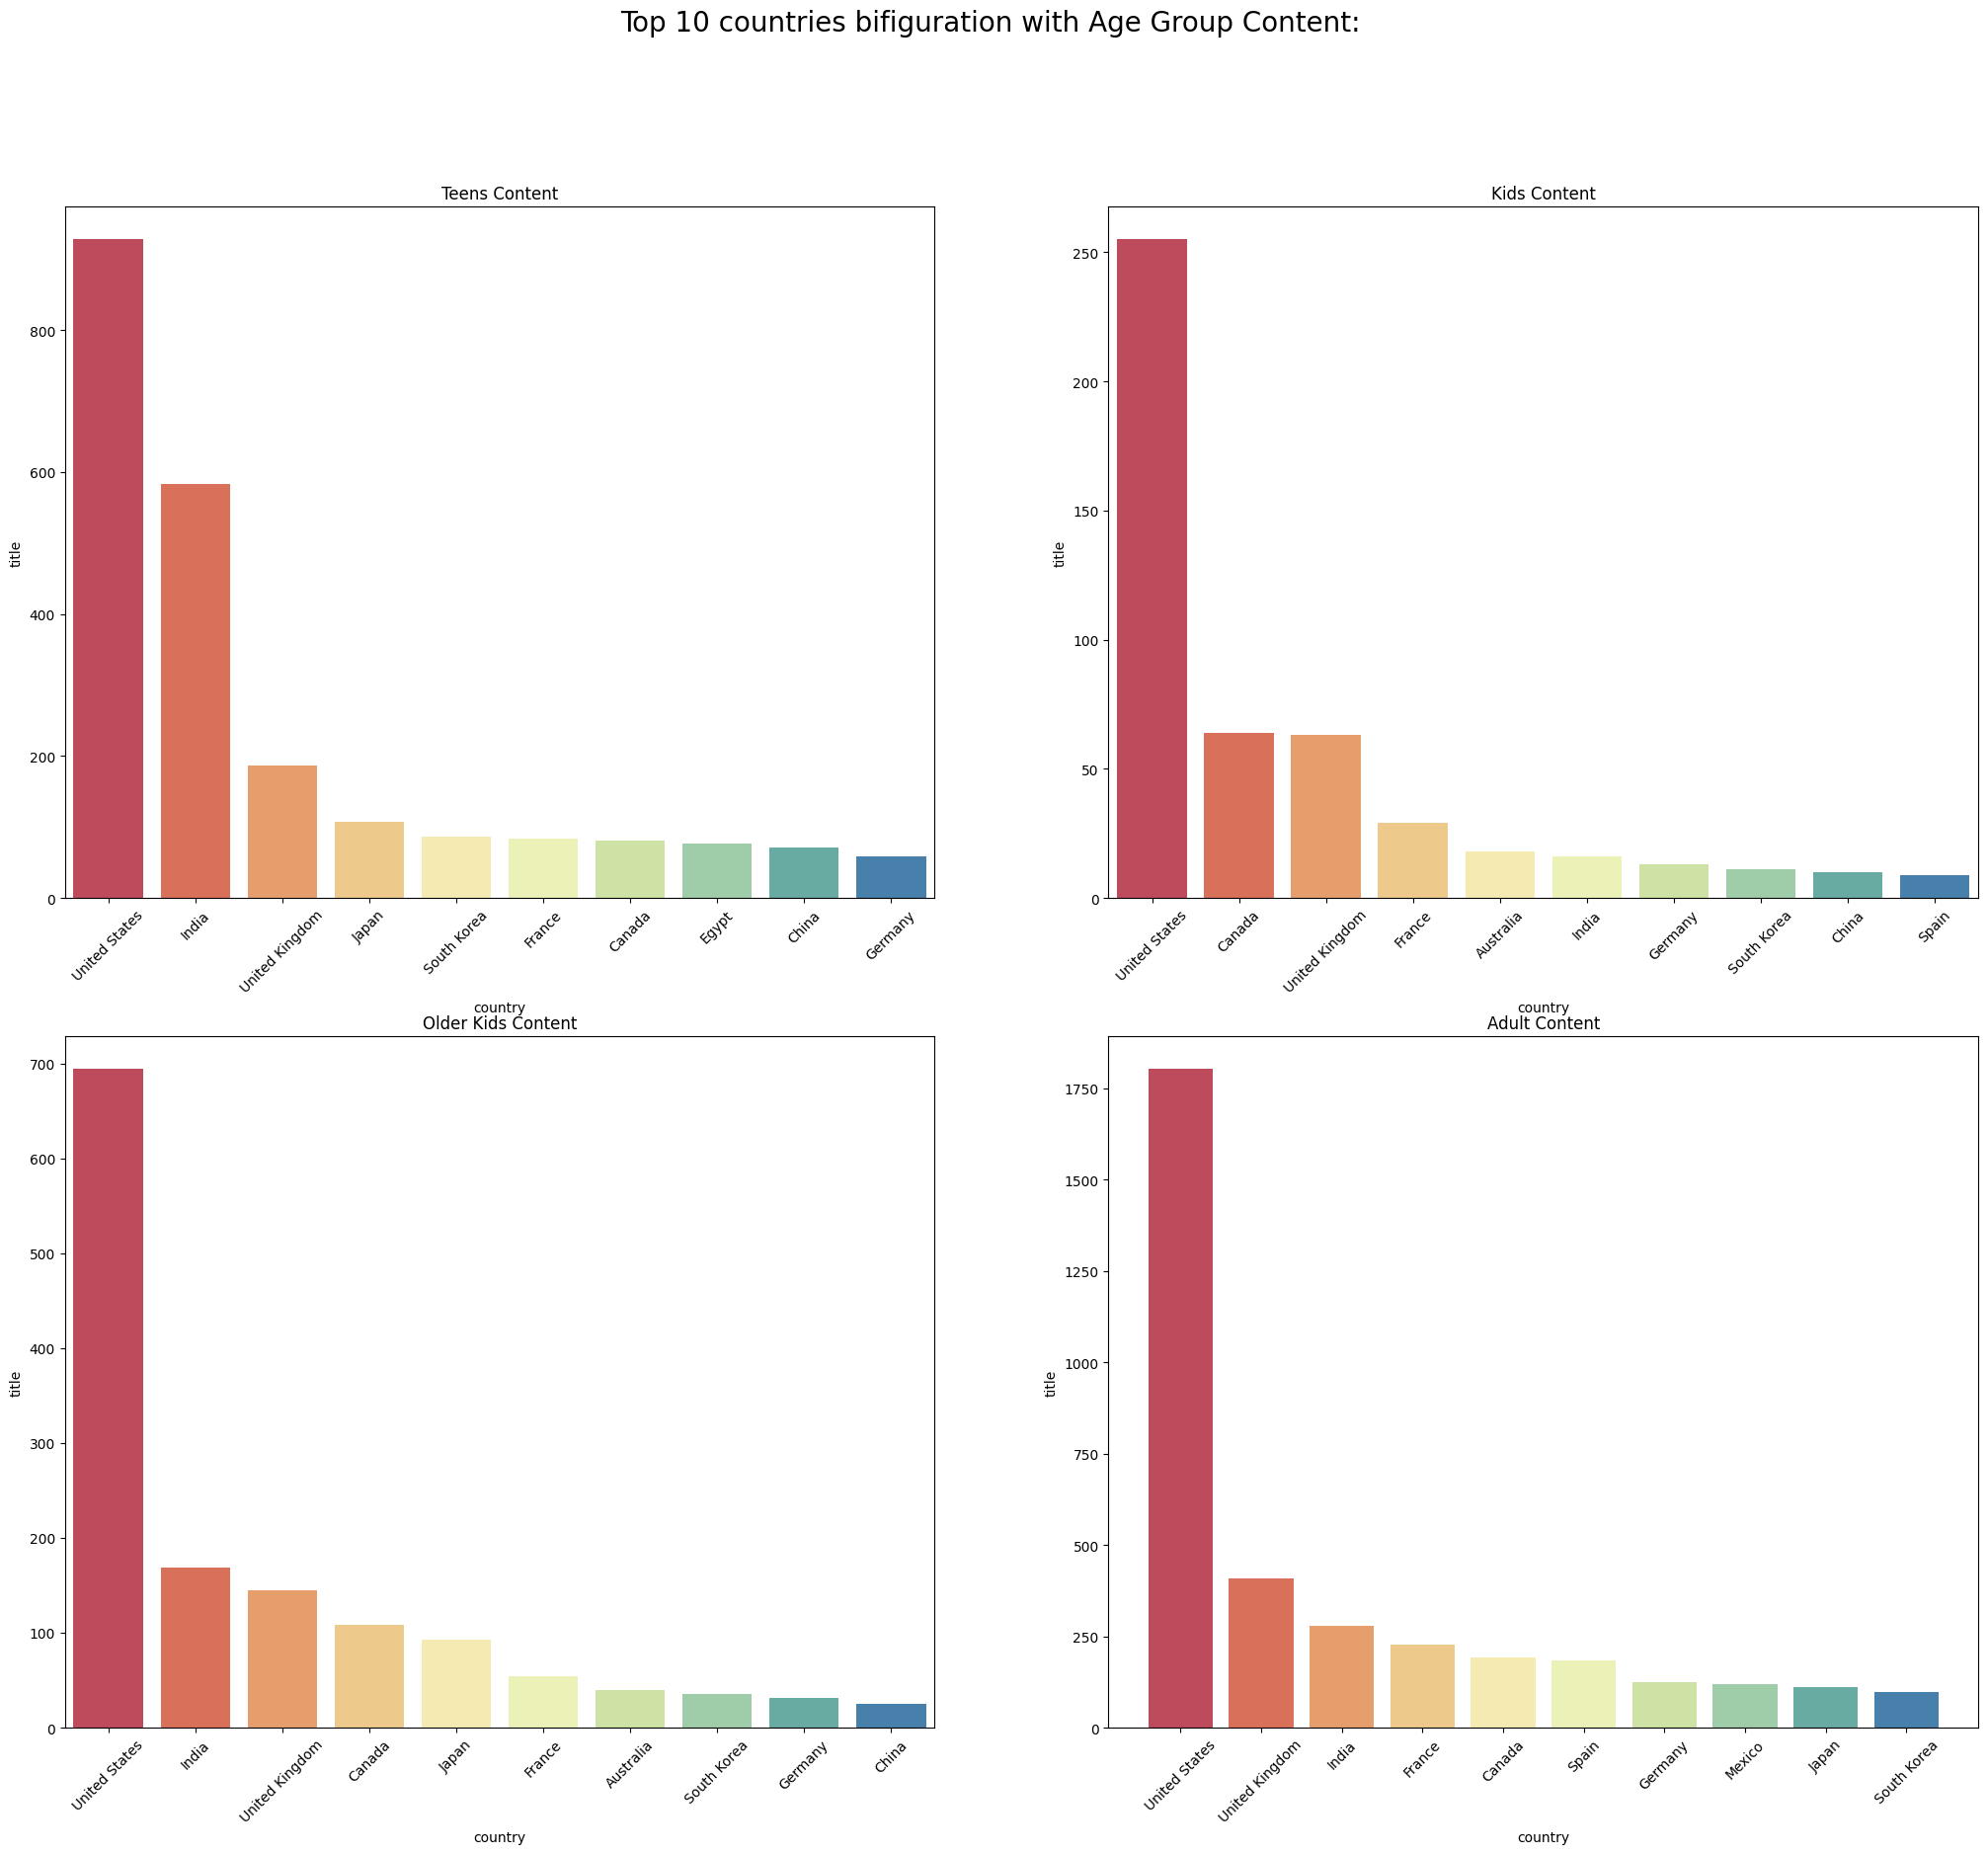

In [49]:
plt.figure(figsize=(25,20)).suptitle("Top 10 countries bifiguration with Age Group Content:",fontsize=20)

plt.subplot(2,2,1)
sns.barplot(data=teens_df_top10,x="country",y="title",palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Teens Content")

plt.subplot(2,2,2)
sns.barplot(data=kids_df_top10,x="country",y="title",palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Kids Content")

plt.subplot(2,2,3)
sns.barplot(data=older_kids_df_top10,x="country",y="title",palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Older Kids Content")

plt.subplot(2,2,4)
sns.barplot(data=adults_df_top10,x="country",y="title",palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Adult Content")

plt.plot()

- ***Insights***:
1. Top 3 countries where Netflix has teens and older kids audience are US, India and UK:
Upon analysing we could see that the teens in US and india has the variation of about 30% whereas in the older kids catrgory India is around 30% of US.

2. Top 3 countries where kids consume the content are US, Canada and UK:
The same pattern we could see with the US and canada audience in the kids category.

3. Top 3 countries with Adult audience are again the US, UK and India but in 18+ audience, India is at 3rd:
The same patterns follows here as well where UK is way less in this Category

In [50]:
df_temp.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Adults,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,Adults,38


In [51]:
df_temp['cast']=df_temp['cast'].str.split(', ')

In [52]:
df_temp=df_temp.explode('cast')

In [55]:
df_movie=df_temp.loc[(df_temp['type']=='Movie') & (df_temp['cast']!='Unknown Cast')]
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,week_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Liza Koshy,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,38


In [56]:
df_mov_cast_top10=df_movie.groupby(['cast']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_mov_cast_top10

,cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30
638,Akshay Kumar,30
12026,Julie Tejwani,28
18322,Paresh Rawal,28
1311,Amitabh Bachchan,28
3351,Boman Irani,27
20685,Rupa Bhimani,27


In [57]:
df_mov_cast_top10=df_movie.groupby(['cast']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_mov_cast_top10

,cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30
638,Akshay Kumar,30
12026,Julie Tejwani,28
18322,Paresh Rawal,28
1311,Amitabh Bachchan,28
3351,Boman Irani,27
20685,Rupa Bhimani,27


In [58]:
df_TV_cast=df_temp.loc[(df_temp['type']=='TV Show') & (df_temp['cast']!='Unknown Cast')]
df_TV_cast_top10=df_TV_cast.groupby(['cast']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_TV_cast_top10

,cast,title
13172,Takahiro Sakurai,25
14519,Yuki Kaji,19
6772,Junichi Suwabe,17
2863,Daisuke Ono,17
14503,Yuichi Nakamura,16
252,Ai Kayano,16
14435,Yoshimasa Hosoya,15
6729,Jun Fukuyama,15
3113,David Attenborough,14
14439,Yoshitsugu Matsuoka,13


/tmp/ipykernel_1721/3514621426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mov_cast_top10, x='cast', y='title', palette=("Spectral"))
/tmp/ipykernel_1721/3514621426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_TV_cast_top10, x='cast', y='title', palette=("Spectral"))


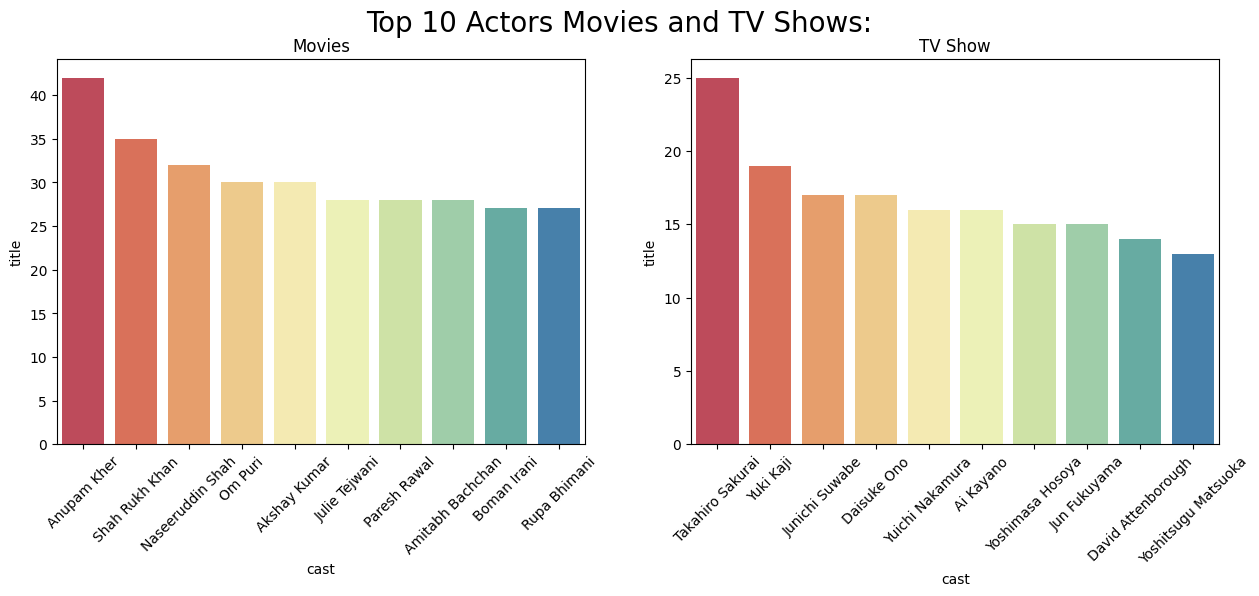

In [59]:
plt.figure(figsize=(15,5)).suptitle("Top 10 Actors Movies and TV Shows:",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=df_mov_cast_top10, x='cast', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=df_TV_cast_top10, x='cast', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("TV Show")

plt.show()

In [60]:
df_temp['director']=df_temp['director'].str.split(', ')
df_temp=df_temp.explode('director')
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38


In [61]:
df_mov_dir=df_temp.loc[(df_temp['type']=='Movie') & (df_temp['director']!='Unknown Director')]
df_mov_dir_top10=df_mov_dir.groupby(['director']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_mov_dir_top10

,director,title
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
2737,Marcus Raboy,15
1861,Jay Karas,15
726,Cathy Garcia-Molina,13
2813,Martin Scorsese,12
4723,Youssef Chahine,12
1858,Jay Chapman,12


In [63]:
df_TV_dir=df_temp.loc[(df_temp['type']=='TV Show') & (df_temp['director']!='Unknown Director')]
df_TV_dir_top10=df_TV_dir.groupby(['director']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_TV_dir_top10

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
128,Joe Berlinger,2
251,Shin Won-ho,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
259,Stan Lathan,2
235,Rob Seidenglanz,2
103,Iginio Straffi,2


/tmp/ipykernel_1721/968688670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mov_dir_top10, x='director', y='title', palette=("Spectral"))
/tmp/ipykernel_1721/968688670.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_TV_dir_top10, x='director', y='title', palette=("Spectral"))


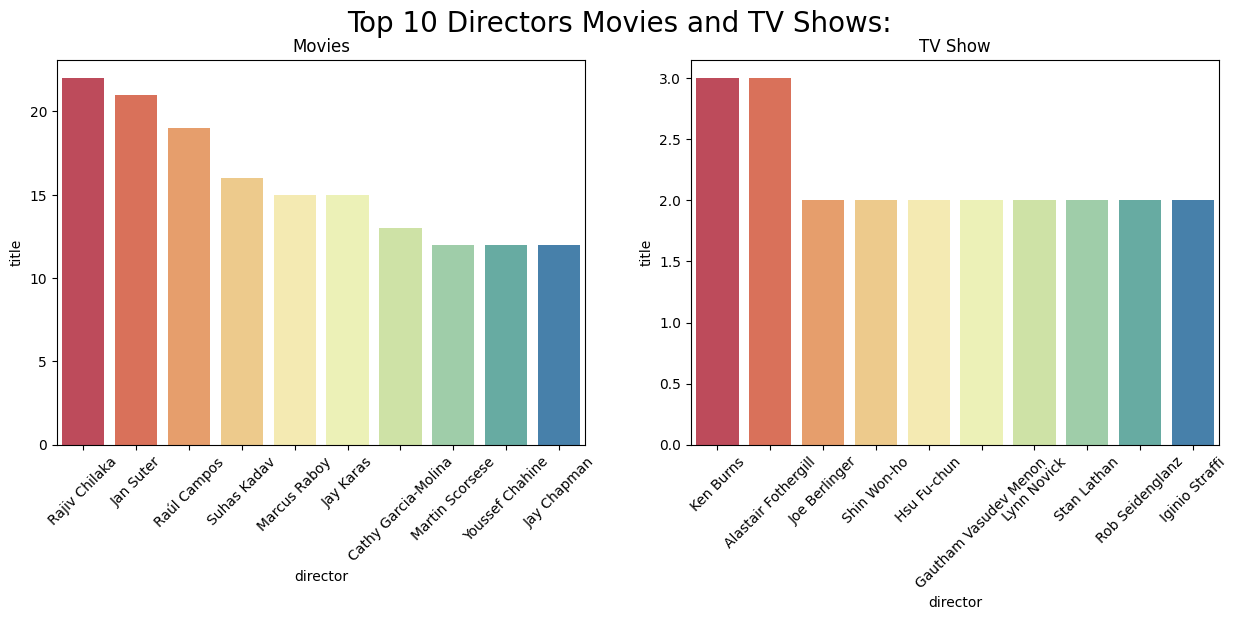

In [64]:
plt.figure(figsize=(15,5)).suptitle("Top 10 Directors Movies and TV Shows:",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=df_mov_dir_top10, x='director', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=df_TV_dir_top10, x='director', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("TV Show")

plt.show()

In [65]:
df_temp.groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)

,listed_in,country,title
683,International Movies,India,864
501,Dramas,United States,835
232,Comedies,United States,680
442,Dramas,India,662
372,Documentaries,United States,511
...,...,...,...
270,Crime TV Shows,Philippines,1
272,Crime TV Shows,Puerto Rico,1
274,Crime TV Shows,Senegal,1
670,International Movies,Dominican Republic,1


In [66]:
Mov_list_US=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='United States')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
Mov_list_IN=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='India')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
Mov_list_UK=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='United Kingdom')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)

In [70]:
TV_list_US=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='United States')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)
TV_list_IN=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='India')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)
TV_list_UK=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='United Kingdom')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)

/tmp/ipykernel_1721/2376341906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Mov_list_US, x='listed_in',y='title', palette=("Spectral"))
/tmp/ipykernel_1721/2376341906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Mov_list_IN, x='listed_in',y='title', palette=("Spectral"))
/tmp/ipykernel_1721/2376341906.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Mov_list_UK, x='listed_in',y='title', palette=("Spectral"))


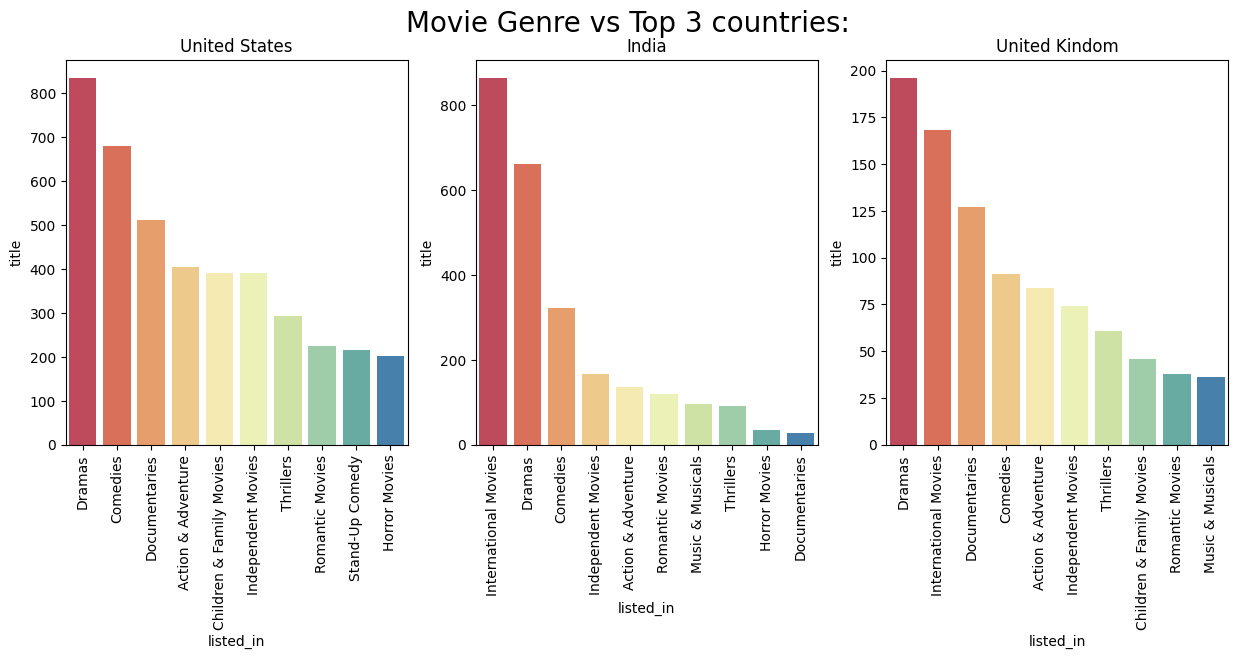

In [71]:
plt.figure(figsize=(15,5)).suptitle("Movie Genre vs Top 3 countries:", fontsize=20)

plt.subplot(1,3,1)
sns.barplot(data=Mov_list_US, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United States')

plt.subplot(1,3,2)
sns.barplot(data=Mov_list_IN, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('India')

plt.subplot(1,3,3)
sns.barplot(data=Mov_list_UK, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United Kindom')

plt.show()

- ***Insight***: In Movie type, Top 3 counties with top 10 genres, where US and UK has Drama on the top where, in India International movies performs well, along with documentories and comedies which is almost same for all there.

/tmp/ipykernel_1721/674600437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TV_list_US, x='listed_in',y='title', palette=("Spectral"))
/tmp/ipykernel_1721/674600437.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TV_list_IN, x='listed_in',y='title', palette=("Spectral"))
/tmp/ipykernel_1721/674600437.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TV_list_UK, x='listed_in',y='title', palette=("Spectral"))


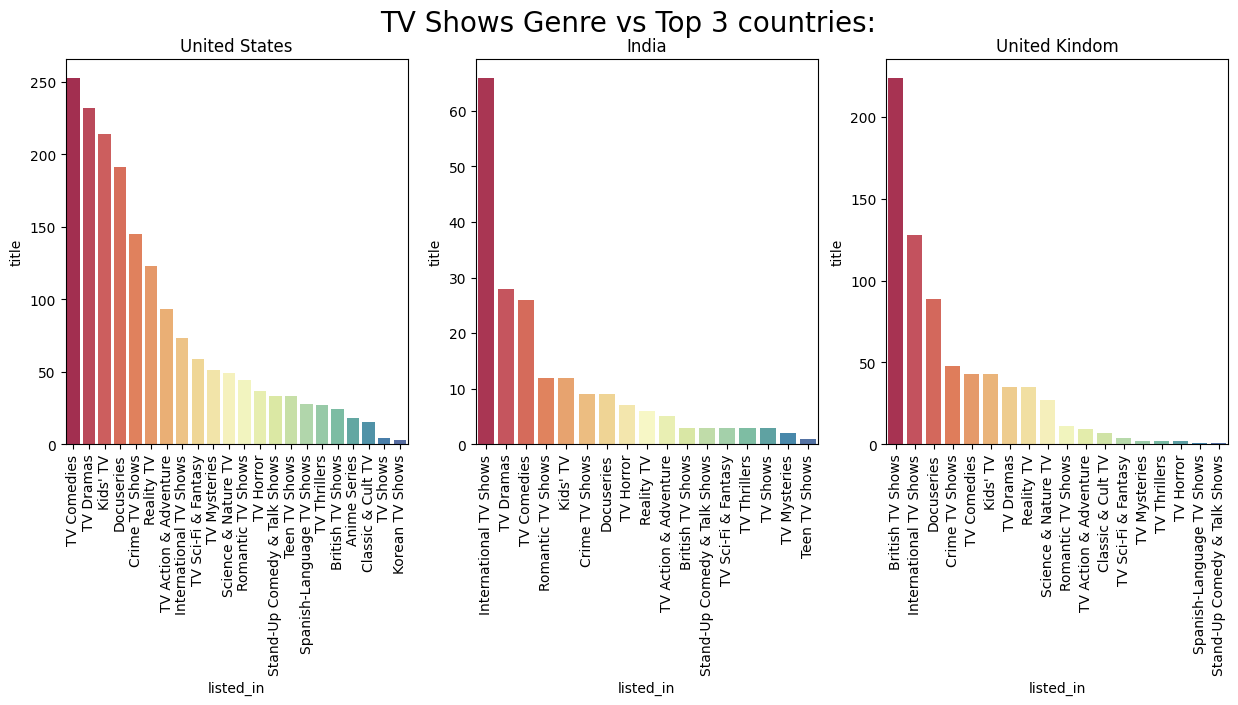

In [72]:
plt.figure(figsize=(15,5)).suptitle("TV Shows Genre vs Top 3 countries:", fontsize=20)

plt.subplot(1,3,1)
sns.barplot(data=TV_list_US, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United States')

plt.subplot(1,3,2)
sns.barplot(data=TV_list_IN, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('India')

plt.subplot(1,3,3)
sns.barplot(data=TV_list_UK, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United Kindom')

plt.show()

- ***Insight***: In TV shows, Top 3 counties with top 10 genres, where TV comedy, drama and kids TV is most consumed in US, UK has British TV shows, and International Shows performed well, in India International TV, TV comedies and documentories do the same.

In [73]:

df_mov['year_added']=df_mov['date_added'].str.split().apply(lambda x:x[-1])

/tmp/ipykernel_1721/935639919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_added']=df_mov['date_added'].str.split().apply(lambda x:x[-1])


In [74]:
df_mov['release_year'].astype('int')

0       2020
6       2021
7       1993
7       1993
7       1993
        ... 
8801    2015
8802    2007
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 7809, dtype: int64

In [75]:
df_mov['year_added']=df_mov['year_added'].astype('int')

/tmp/ipykernel_1721/3969314675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_added']=df_mov['year_added'].astype('int')


In [76]:
df_mov['year_diff']=df_mov['year_added'] - df_mov['release_year']
df_mov.head()

/tmp/ipykernel_1721/955480275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_diff']=df_mov['year_added'] - df_mov['release_year']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,year_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28


/tmp/ipykernel_1721/4293943218.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_mov[df_mov.release_year>=2011], x='year_diff', palette=("Spectral"))


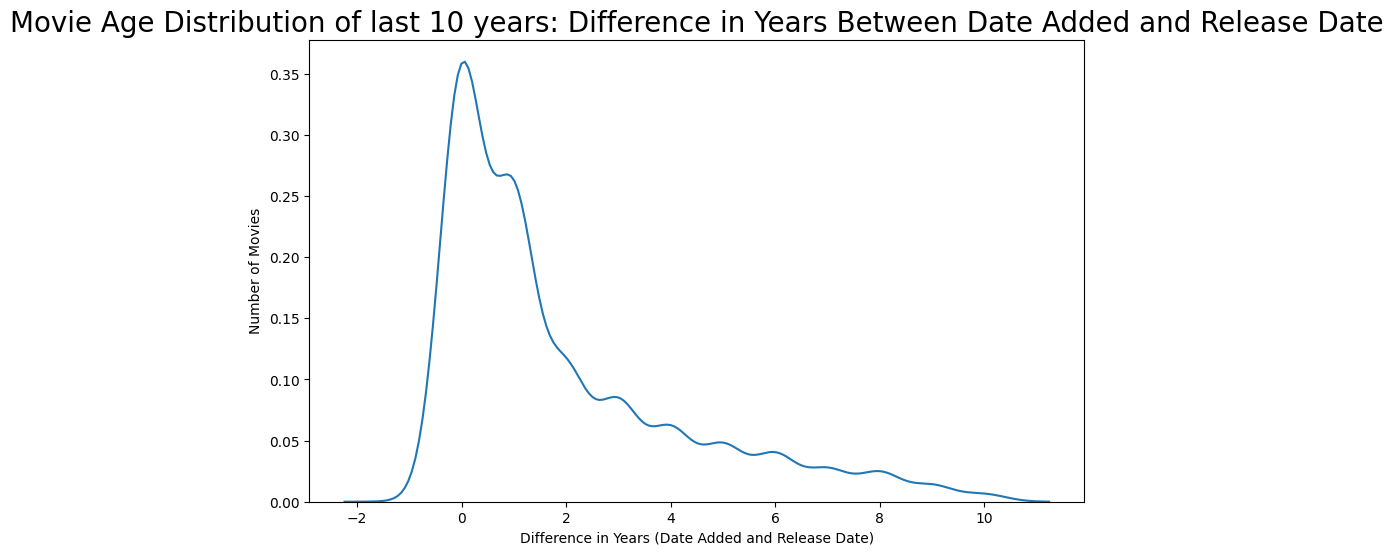

In [77]:
#Last 10 years 
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_mov[df_mov.release_year>=2011], x='year_diff', palette=("Spectral"))
plt.xlabel('Difference in Years (Date Added and Release Date)')
plt.ylabel("Number of Movies")
plt.title("Movie Age Distribution of last 10 years: Difference in Years Between Date Added and Release Date", fontsize=20)
plt.show()

In [78]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,38


- ***Insights***: Upon checking we could we see that the major content on the Netflix is added within an year or two, so for any content which is released on the platform after 5-8 years is less and so on.

In [79]:
df_temp['year_added']=df_temp['date_added'].dt.year

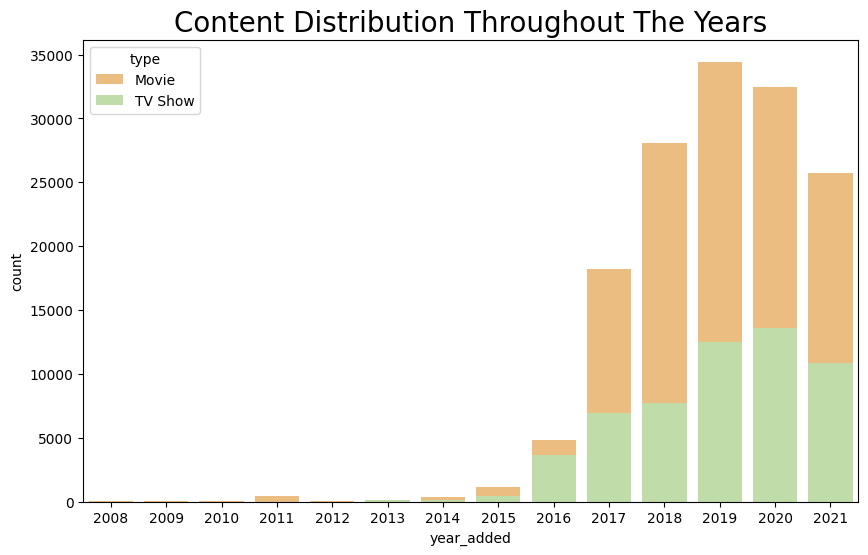

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_temp, x='year_added', hue='type', dodge=False, palette=("Spectral"))
plt.title('Content Distribution Throughout The Years', fontsize=20)
plt.show()

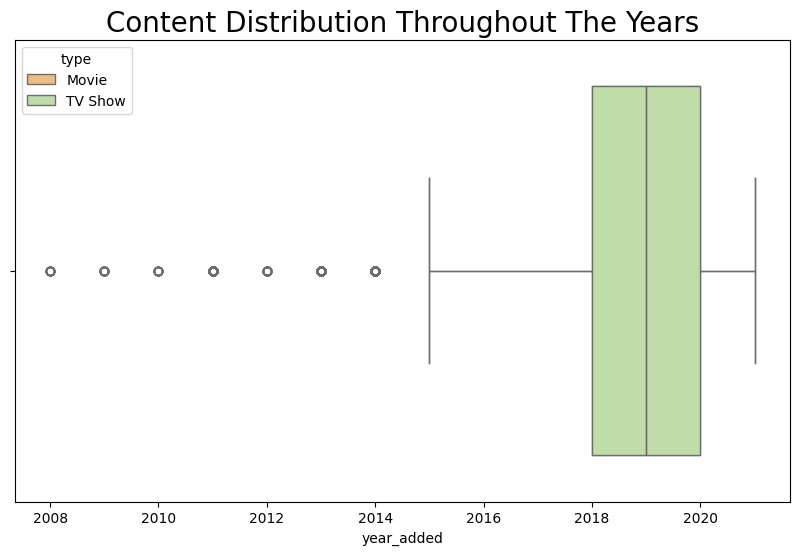

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_temp, x='year_added', hue='type', dodge=False, palette=("Spectral"))
plt.title('Content Distribution Throughout The Years', fontsize=20)
plt.show()

- ***Insights***: After some more analysis, found that the year 2019 was the best year for the platform, where it could be seen that from 2016 to 2018, there is a good growth in the content and in 2019, there is a peak.

In [82]:
df_mov['duration_min']=df_mov['duration'].str.split(' ').apply(lambda x:x[0])

/tmp/ipykernel_1721/3935175170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['duration_min']=df_mov['duration'].str.split(' ').apply(lambda x:x[0])


In [83]:
df_mov['duration_min'].unique()

array(['90', '91', '125', '104', '127', '67', '94', '161', '61', '166',
       '147', '103', '97', '106', '111', '110', '105', '96', '124', '116',
       '98', '23', '115', '122', '99', '88', '100', '102', '93', '95',
       '85', '83', '113', '13', '182', '48', '145', '87', '92', '80',
       '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '59', '139', '69', '148', '189',
       '141', '130', '138', '81', '132', '123', '65', '68', '66', '62',
       '74', '131', '39', '46', '38', '126', '155', '159', '137', '12',
       '273', '36', '34', '77', '60', '49', '58', '72', '204', '212',
       '25', '73', '29', '47', '32', '35', '71', '149', '33', '15', '54',
       '224', '162', '37', '75', '79', '55', '158', '164', '173', '181',
       '185', '21', '24', '51', '151', '42', '22', '134', '177', '52

In [84]:
df_mov_min=df_mov.groupby('duration_min')['title'].nunique().reset_index().sort_values('title',ascending=False).head(10)
df_mov_min

,duration_min,title
195,90,152
199,94,146
202,97,146
198,93,146
196,91,144
200,95,137
201,96,130
197,92,129
3,102,122
203,98,120


In [85]:
df_mov['duration_min']=df_mov['duration_min'].astype('int')

/tmp/ipykernel_1721/2894796044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['duration_min']=df_mov['duration_min'].astype('int')


In [86]:

df_mov['duration_min'].mean()

100.41567422205148

In [87]:
df_TV['duration_season']=df_TV['duration'].str.split(' ').apply(lambda x:x[0])

NameError: name 'df_TV' is not defined